#  SENTIMENT PREDICTION 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# Loading the data.

In [2]:
movie=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")
sample=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv")
train=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
test=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")

# The shapes of Movie, train, test and sample data. 

In [3]:
print('Movie: ',movie.shape)
print('Sample: ',sample.shape)
print('train: ',train.shape)
print('test: ',test.shape)

Movie:  (143258, 14)
Sample:  (55315, 2)
train:  (162758, 5)
test:  (55315, 4)


# Features in the datasets.

In [4]:
print(movie.columns)
print(train.columns)
print(test.columns)

Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')
Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment'],
      dtype='object')
Index(['movieid', 'reviewerName', 'isTopCritic', 'reviewText'], dtype='object')


# Cheking sample columns.

In [5]:
sample.columns

Index(['id', 'sentiment'], dtype='object')

#  Cheking movie data .

In [6]:
movie.isna().sum()

movieid                      0
title                        0
audienceScore            70010
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120253
soundType               127341
dtype: int64

In [7]:
movie['movieid'].value_counts()

escape_the_terminator_tyler_durden_astonish         367
silent_mystery_the_terminator                        17
crimson_james_t._kirk_marty_mcfly_hulk               17
darth_vader_dazzling_courageous_holly_golightly      16
rocky_balboa_wonder_woman_majestic_emerald           16
                                                   ... 
anakin_skywalker_frodo_baggins_t-800_black_widow      1
phantom_hannibal_lecter_don_vito_corleone_pirate      1
v_bruce_wayne_stardust                                1
mystery_lara_croft_tony_montana                       1
wonder_hermione_granger_hulk_v                        1
Name: movieid, Length: 126404, dtype: int64

#  ****Findings from train data****

# Checking for missing values.

In [8]:
train.isna().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

# Count of different movieid's in train data.

In [9]:
train['movieid'].value_counts()

escape_the_terminator_tyler_durden_astonish    708
fantasy_forrest_gump_intrigue                  245
james_t._kirk_marty_mcfly_astonish             186
marvelous_lara_croft_luke_skywalker            140
michael_corleone_v_marty_mcfly_tony_stark      138
                                              ... 
james_bond_legend_marty_mcfly_elegant            1
myriad_aurora_edward_scissorhands                1
mystic_ferris_bueller_spectacular                1
crimson_velvet                                   1
forrest_gump_fantasy_epic                        1
Name: movieid, Length: 16812, dtype: int64

# overview of train dataset.

In [10]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


# Comparing between counts of positive and negative sentiments in train dataset.

<Axes: ylabel='Count'>

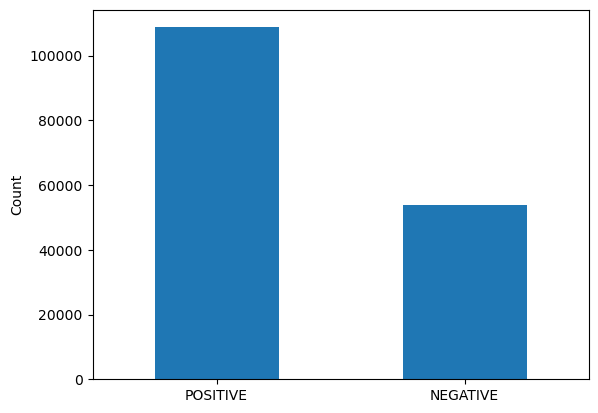

In [11]:
train['sentiment'].value_counts().plot(kind='bar', ylabel='Count', rot=0)

# Comparing betwwen frequent and not frequent reviewer in train data.

<Axes: ylabel='isFrequentReviewer'>

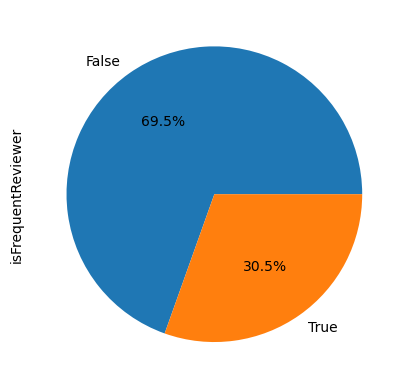

In [12]:
train['isFrequentReviewer'].value_counts().plot(kind='pie',autopct="%1.1f%%")

# Cheking outliers in review column.

<Axes: ylabel='Count'>

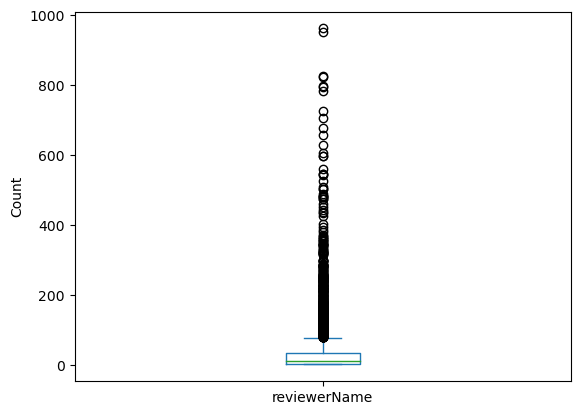

In [13]:

train['reviewerName'].value_counts().plot(kind='box', ylabel='Count', rot=0)

# Count of different reviewerName.

In [14]:

train['reviewerName'].value_counts()

Sherri Morrison      962
Veronica Serrano     952
Mrs. Vickie Young    827
Kristy Ferguson      822
Heather Pena         797
                    ... 
Ashley Munoz           1
Ryan Dean              1
Joanna Li              1
Jason Carroll          1
Chad Mueller           1
Name: reviewerName, Length: 4482, dtype: int64

# Insights of train data.

In [15]:
train.describe()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,156311,162758
unique,16812,4482,2,155071,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE
freq,708,962,113189,29,108761


# Filling missing values in train data.

In [16]:
print(train.shape)
train.fillna('',inplace=True)
train.shape

(162758, 5)


(162758, 5)

# ****Working on test data.****

# Checking for null values in test data.

In [17]:
test.isna().sum()

movieid            0
reviewerName       0
isTopCritic        0
reviewText      2510
dtype: int64

# The column names are different in train and test data. Renaming the column name in test data.

In [18]:
test.rename(columns={'isTopCritic':'isFrequentReviewer'}, inplace=True)
test.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText'], dtype='object')

# Filling missing values in test data. filling empty string as done in train data.

In [19]:
test['reviewText'].fillna('', inplace=True)

In [20]:
print(test.shape)

(55315, 4)


# Splitting the train data into independent and dependent features.

In [21]:
y = train['sentiment']
X = train.drop(['sentiment'], axis=1)

# Splitting train data into independent and dependent features.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(130206, 4) (130206,)
(32552, 4) (32552,)


# Converting categorical columns into numerical values.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vec_reviewer = CountVectorizer()
vec_reviewer.fit(X_train['reviewerName'].values)


X_train_reviewer = vec_reviewer.transform(X_train['reviewerName'].values)
X_test_reviewer = vec_reviewer.transform(X_test['reviewerName'].values)
test_reviewer = vec_reviewer.transform(test['reviewerName'].values)

print(X_train_reviewer.shape, y_train.shape)
print(X_test_reviewer.shape, y_test.shape)
print(test_reviewer.shape)

(130206, 1516) (130206,)
(32552, 1516) (32552,)
(55315, 1516)


In [24]:
vec_movieid = CountVectorizer()
vec_movieid.fit(X_train['movieid'].values)

X_train_movieid = vec_movieid.transform(X_train['movieid'].values)
X_test_movieid = vec_movieid.transform(X_test['movieid'].values)
test_movieid = vec_movieid.transform(test['movieid'].values)

print(X_train_movieid.shape, y_train.shape)
print(X_test_movieid.shape, y_test.shape)
print(test_movieid.shape)

(130206, 16576) (130206,)
(32552, 16576) (32552,)
(55315, 16576)


In [25]:
vec_text = TfidfVectorizer(min_df=5,ngram_range=(1,4), max_features=10000)
vec_text.fit(X_train['reviewText'].values)

X_train_text = vec_text.transform(X_train['reviewText'].values)
X_test_text = vec_text.transform(X_test['reviewText'].values)
test_text = vec_text.transform(test['reviewText'].values)

print(X_train_text.shape, y_train.shape)
print(X_test_text.shape, y_test.shape)
print(test_text.shape)

(130206, 10000) (130206,)
(32552, 10000) (32552,)
(55315, 10000)


In [26]:
from sklearn.preprocessing import OneHotEncoder

ohe_freq = OneHotEncoder()
ohe_freq.fit(X_train['isFrequentReviewer'].values.reshape(-1,1))

X_train_freq = ohe_freq.transform(X_train['isFrequentReviewer'].values.reshape(-1,1))
X_test_freq = ohe_freq.transform(X_test['isFrequentReviewer'].values.reshape(-1,1))
test_freq = ohe_freq.transform(test['isFrequentReviewer'].values.reshape(-1,1))

print(X_train_freq.shape, y_train.shape)
print(X_test_freq.shape, y_test.shape)
print(test_freq.shape)

(130206, 2) (130206,)
(32552, 2) (32552,)
(55315, 2)


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)

y_tr = le.transform(y_train)
y_te = le.transform(y_test)

print(y_tr.shape, y_te.shape)

(130206,) (32552,)


# Merging the transformed columns.

In [28]:
from scipy.sparse import hstack

X_tr = hstack((X_train_movieid, X_train_reviewer, X_train_freq, X_train_text))
X_te = hstack((X_test_movieid, X_test_reviewer, X_test_freq, X_test_text))
te = hstack((test_movieid, test_reviewer, test_freq, test_text))

print(X_tr.shape, y_tr.shape)
print(X_te.shape, y_te.shape)
print(te.shape)

(130206, 28094) (130206,)
(32552, 28094) (32552,)
(55315, 28094)


# Base models comparisons.( Logistic regression, Random Forest and Xgboot Classifier)

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_tr, y_tr)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score

y_pr = lr.predict(X_te)

accuracy_score(y_te, y_pr)

0.8283976406979602

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_tr, y_tr)

RandomForestClassifier(n_estimators=20)

In [32]:
from sklearn.metrics import accuracy_score

y_pr2 = rf.predict(X_te)

accuracy_score(y_te, y_pr2)

0.7468972720570165

In [33]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_tr, y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
from sklearn.metrics import accuracy_score

y_pr3 = xgb.predict(X_te)

accuracy_score(y_te, y_pr3)

0.7487097566969771

# Pipeline, feature selection and logistic regression.

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2

In [36]:
trf2 = SelectKBest(chi2, k=20000)
trf3 = LogisticRegression()

In [37]:
pipe1 = Pipeline([
    ('trf2', trf2),
    ('trf3',trf3)
    ])

In [38]:
pipe1.fit(X_tr, y_tr)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('trf2',
                 SelectKBest(k=20000,
                             score_func=<function chi2 at 0x7dba7505a830>)),
                ('trf3', LogisticRegression())])

In [39]:
from sklearn import set_config
set_config(display='diagram')
pipe1

Pipeline(steps=[('trf2',
                 SelectKBest(k=20000,
                             score_func=<function chi2 at 0x7dba7505a830>)),
                ('trf3', LogisticRegression())])

# Predicting sentiment of test data i.e. 20% of train data.

In [40]:
y_pred = pipe1.predict(X_te)

# Printing classification report.

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72     10800
           1       0.84      0.91      0.88     21752

    accuracy                           0.83     32552
   macro avg       0.82      0.79      0.80     32552
weighted avg       0.83      0.83      0.82     32552



# Applying Hyperparameter tunning.

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = [    
    {'penalty' : ['l2', 'elasticnet','l1'],
    'C' : [0.1,0.01,0.001],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [200,500, 1000,2000],
    }
]

In [44]:
grid_search=GridSearchCV(estimator=trf3, param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_tr,y_tr)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=0.1, max_iter=200, penalty=l2, solver=lbfgs; total time=   4.2s
[CV] END ..C=0.1, max_iter=200, penalty=l2, solver=newton-cg; total time=   5.5s
[CV] END ..C=0.1, max_iter=200, penalty=l2, solver=liblinear; total time=   2.6s
[CV] END ..C=0.1, max_iter=200, penalty=l2, solver=liblinear; total time=   3.1s
[CV] END ........C=0.1, max_iter=200, penalty=l2, solver=sag; total time=  10.2s
[CV] END .......C=0.1, max_iter=200, penalty=l2, solver=saga; total time=  31.2s
[CV] END .......C=0.1, max_iter=200, penalty=l2, solver=saga; total time=  34.3s
[CV] END ......C=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   4.0s
[CV] END ......C=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   3.9s
[CV] END ......C=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   3.9s
[CV] END ......C=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   3.8s
[CV] END ..C=0.1, max_iter=500, penalty=l2, solver=newton-cg; total time=   4.7s
[CV] END ..C=0.1, max_iter=5

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.01, 0.001],
                          'max_iter': [200, 500, 1000, 2000],
                          'penalty': ['l2', 'elasticnet', 'l1'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=2)

# Printing best parameter obtained from GridsearchCv

In [45]:
grid_search.best_params_

{'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}

# Predicting for sentiments of 20% of data obtained from train data after splitting and printing classification report.

In [46]:
y_test_pred=grid_search.predict(X_te)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_te, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.47      0.60     10800
           1       0.78      0.94      0.86     21752

    accuracy                           0.79     32552
   macro avg       0.80      0.71      0.73     32552
weighted avg       0.79      0.79      0.77     32552



# Printing f1 score for testing data from the model which is giving highest accuracy score ( model logistic regression without feature selection and hyperparameter tunning).

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
f1 = f1_score(y_te, y_pr,average="micro")
f1

0.8283976406979602

# Predicting sentiment label for Test data from the model which is giving higest score (logistic regression without hyperparameter tunning) and converting numerical labels to Positive or negative.

In [49]:
y_predict = lr.predict(te)

In [50]:
y_predict=["POSITIVE" if label==1 else "NEGATIVE"for label in y_predict]

In [51]:
prediction=y_predict
id=[]
for i in range (len(prediction)):
    id.append(i)

# Submission of Prediction.

In [52]:
final_prediction=pd.DataFrame({"id":id,"sentiment":prediction})
final_prediction.to_csv("semifinal_submission.csv",index=False)